In [6]:
import json
import csv
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [7]:
file_path = 'rost_razmer.sgd'

# Read the Statgraphics file content as a string
with open(file_path, 'r', encoding='utf-8') as file:
    xml_data = file.read()

# Parse the XML data
root = ET.fromstring(xml_data)

# Create an empty list to store rows of data
data = []

# Loop through the ROW elements and extract data
for row in root.findall('.//ROW'):
    row_data = {}
    for elem in row:
        row_data[elem.tag] = elem.text
    data.append(row_data)

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

     C1  C2  C3 C4   C5   C6    C7   C8   C9  C10  C11  C12  C13  C14  C15   
0   173  39  70  0  160   66    36  173   39   70  180   42   62  173   56  \
1   164  38  47  0  181   70    42  164   38   47  187   44   90  172   67   
2   170  38  53  0  172   71    41  170   38   53  173   41   63  172   65   
3   180  42  62  1  160   46    35  160   37   49  186   44   80  159   59   
4   187  44  90  1  168   53    38  160   36   54  195   46   90  167   49   
5   173  41  63  1  166   63  38,5  168   38   49  178   43   80  165   52   
6   186  44  80  1  158   54    36  170   39   59  180   42   70  160   52   
7   160  37  49  0  195  105    46  160   37   55  175   39   60  187   87   
8   160  36  54  0  167   70    37  177   39   68  182   42   70  168   55   
9   168  38  49  0  180   75    44  168   39   57  190   43   80  178   68   
10  195  46  90  1  170   53    37  160   37   50  187   43   67  193   70   
11  178  43  80  1  169   52    36  165   36   50  173   43   73

In [8]:
new_column_names = ['rost', 'obuv', 'ves', 'pol','rostNov','vesNov','ObuvNov','Rodev','ObDev','vesDev','RostM','ObuvM','vesM','RostIst','VesIst','ObuvIst']
df.columns = new_column_names

In [9]:
df['rost']=df['rost'].astype(float)
df['obuv']=df['obuv'].astype(float)
df['ves']=df['ves'].astype(float)
df['pol']= df['pol'].astype(int)

In [10]:
#Просмотреть выборку Rost на экране
df['rost']

0     173.0
1     164.0
2     170.0
3     180.0
4     187.0
5     173.0
6     186.0
7     160.0
8     160.0
9     168.0
10    195.0
11    178.0
12    180.0
13    175.0
14    170.0
15    160.0
16    177.0
17    182.0
18    190.0
19    187.0
20    173.0
21    180.0
22    188.0
23    168.0
24    160.0
25    182.0
26    182.0
27    165.0
28    178.0
29    174.0
30    175.0
31    178.0
32    171.0
33    173.0
34    162.0
35    175.0
36    172.0
37    163.0
38    169.0
39    185.0
Name: rost, dtype: float64

In [11]:
print(df['rost'].describe())

count     40.00000
mean     174.70000
std        9.07575
min      160.00000
25%      168.75000
50%      174.50000
75%      180.50000
max      195.00000
Name: rost, dtype: float64


In [12]:
# Вычислить стандартное отклонение
std_deviation = np.std(df['rost'])

# Вычислить количество наблюдений
num_observations = len(df['rost'])

# Вычислить количество интервалов с использованием правила Скотта
num_bins_scott = int(3.5 * std_deviation / (num_observations ** (1/3)))

print(f"Количество интервалов по правилу Скотта: {num_bins_scott}")

Количество интервалов по правилу Скотта: 9


In [13]:
num_bins = 9
bin_width = (df["rost"].max() - df["rost"].min()) / num_bins

# Создание границ интервалов
bin_edges = [df["rost"].min() + i * bin_width for i in range(num_bins + 1)]

# Создание интервалов и меток
intervals = [f"{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}" for i in range(num_bins)]
labels = [f"Интервал {i+1}" for i in range(num_bins)]

# Группировка данных по интервалам с помощью функции cut
df["Интервал"] = pd.cut(df["rost"], bins=bin_edges, labels=labels, include_lowest=True)

# Вычисление частоты данных в каждом интервале
частоты_интервалов = df["Интервал"].value_counts().sort_index()

# Вычисление относительных частот (пропорций)
относительные_частоты = частоты_интервалов / len(df)

# Вычисление накопленных частот и относительных накопленных частот
накопленные_частоты = частоты_интервалов.cumsum()
относительные_накопленные_частоты = накопленные_частоты / len(df)

# Создание DataFrame для отображения результатов
результат_df = pd.DataFrame({
    "Интервал": intervals,
    "Частота": частоты_интервалов,
    "Относительная частота": относительные_частоты,
    "Накопленная частота": накопленные_частоты,
    "Относительная накопленная частота": относительные_накопленные_частоты,
})

print(результат_df)

               Интервал  Частота  Относительная частота  Накопленная частота   
Интервал                                                                       
Интервал 1  160.0-163.9        6                  0.150                    6  \
Интервал 2  163.9-167.8        2                  0.050                    8   
Интервал 3  167.8-171.7        6                  0.150                   14   
Интервал 4  171.7-175.6        9                  0.225                   23   
Интервал 5  175.6-179.4        4                  0.100                   27   
Интервал 6  179.4-183.3        6                  0.150                   33   
Интервал 7  183.3-187.2        4                  0.100                   37   
Интервал 8  187.2-191.1        2                  0.050                   39   
Интервал 9  191.1-195.0        1                  0.025                   40   

            Относительная накопленная частота  
Интервал                                       
Интервал 1             

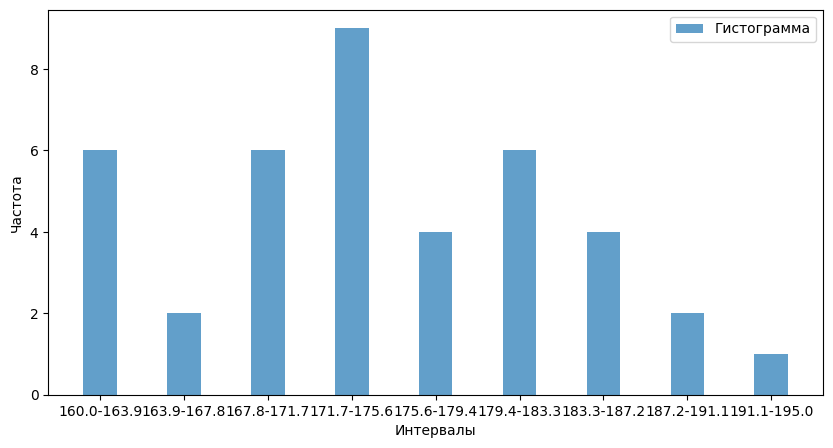

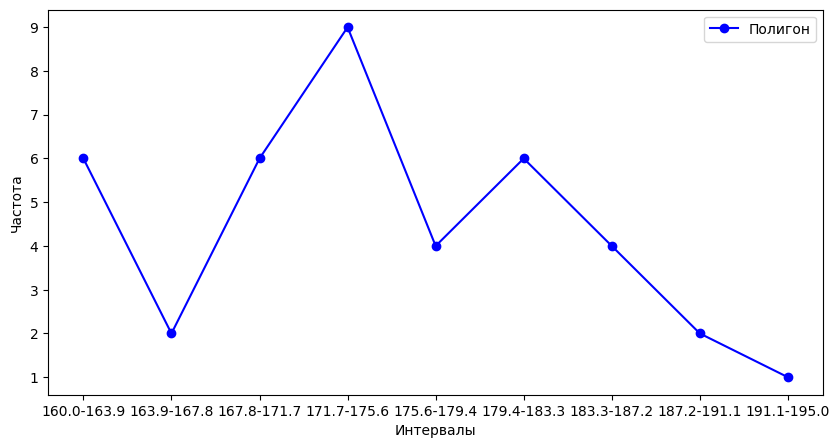

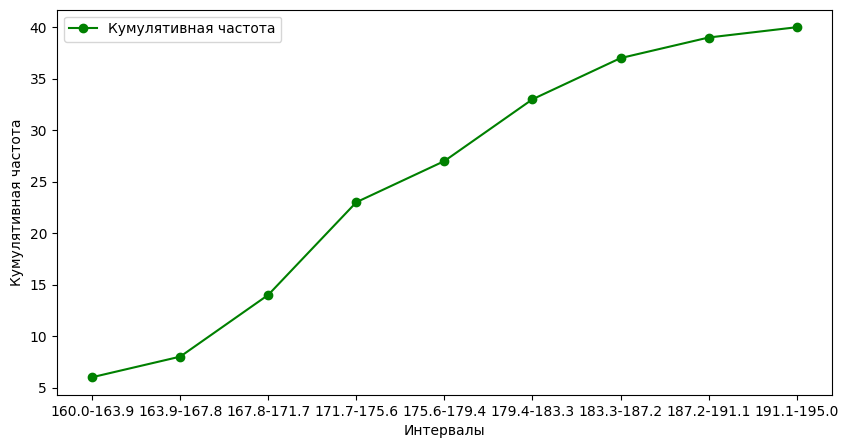

In [14]:
# Построение гистограммы
plt.figure(figsize=(10, 5))
plt.bar(результат_df["Интервал"], результат_df["Частота"], width=0.4, alpha=0.7, label="Гистограмма")
plt.xlabel("Интервалы")
plt.ylabel("Частота")
plt.legend()

# Построение полигона
plt.figure(figsize=(10, 5))
plt.plot(результат_df["Интервал"], результат_df["Частота"], marker='o', linestyle='-', color='b', label="Полигон")
plt.xlabel("Интервалы")
plt.ylabel("Частота")
plt.legend()

# Построение кумулятивной частоты
plt.figure(figsize=(10, 5))
plt.plot(результат_df["Интервал"], результат_df["Накопленная частота"], marker='o', linestyle='-', color='g', label="Кумулятивная частота")
plt.xlabel("Интервалы")
plt.ylabel("Кумулятивная частота")
plt.legend()

# Отображение графиков
plt.show()

глядя на гистограмму, нельзя сказать что рост имеет нормальное распределение

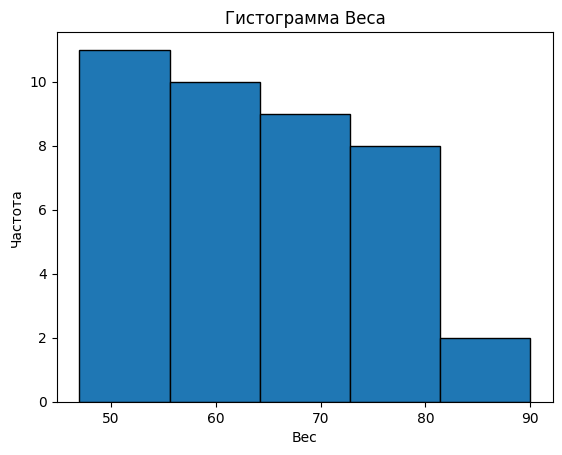

In [15]:
plt.hist(df['ves'], bins=5, edgecolor='black')  
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.title('Гистограмма Веса')
plt.show()

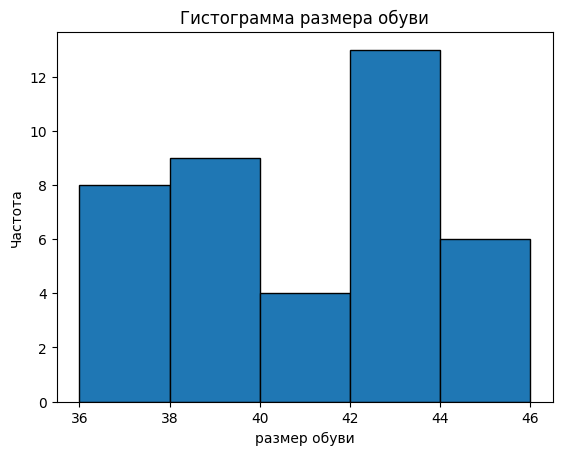

In [16]:
plt.hist(df['obuv'], bins=5, edgecolor='black')  
plt.xlabel('размер обуви')
plt.ylabel('Частота')
plt.title('Гистограмма размера обуви')
plt.show()

судя по гистограммам данные не являются нормальными, возможное решение проблемы, увеличить выборку данных. Учитывая пол, можно построить отдельные гистограммы, что приведет вид к более нормальному

In [17]:

series = pd.Series(df['rost'])

# Вычисление среднего
среднее = series.mean()

# Вычисление моды
мода = series.mode().values[0]

# Вычисление медианы
медиана = series.median()

# Вычисление размаха
размах = series.max() - series.min()

# Вычисление дисперсии
дисперсия = series.var()

# Вычисление стандартного отклонения
стандартное_отклонение = series.std()

# Вычисление асимметрии
асимметрия = series.skew()

# Вычисление эксцесса
эксцесс = series.kurtosis()

print("Среднее:", среднее)
print("Мода:", мода)
print("Медиана:", медиана)
print("Размах:", размах)
print("Дисперсия:", дисперсия)
print("Стандартное отклонение:", стандартное_отклонение)
print("Стандартная асимметрия:", асимметрия)
print("Стандартный эксцесс:", эксцесс)


Среднее: 174.7
Мода: 160.0
Медиана: 174.5
Размах: 35.0
Дисперсия: 82.36923076923078
Стандартное отклонение: 9.075749598200183
Стандартная асимметрия: 0.09792473140494128
Стандартный эксцесс: -0.5989260960422853


Для нормального распределения асимметрия должна быть близка к нулю, а эксцесс близок к 3 (для нормального распределения с нулевым среднеквадратичным отклонением). Это свойства нормального распределения, где среднее, мода и медиана совпадают, размах равен бесконечности, дисперсия и стандартное отклонение конечны и асимметрия и эксцесс равны 0 и 3 соответственно.

In [18]:
series = pd.Series(df['obuv'])
series1 = pd.Series(df['ves'])
# Вычисление среднего
среднее = series.mean()
среднее_ves = series1.mean()
# Вычисление моды
мода = series.mode().values[0]
мода_ves = series1.mode().values[0]
# Вычисление медианы
медиана = series.median()
медиана_ves = series1.median()
# Вычисление размаха
размах = series.max() - series.min()
размах_ves = series1.max() - series1.min()
# Вычисление дисперсии
дисперсия = series.var()
дисперсия_ves = series1.var()
# Вычисление стандартного отклонения
стандартное_отклонение = series.std()
стандартное_отклонение_ves = series1.std()
# Вычисление асимметрии
асимметрия = series.skew()
асимметрия_ves = series1.skew()
# Вычисление эксцесса
эксцесс = series.kurtosis()
эксцесс_ves = series1.kurtosis()
print("Среднее:",среднее)
print("Мода:",мода)
print("Медиана:", медиана)
print("Размах:", размах)
print("Дисперсия:", дисперсия)
print("Стандартное отклонение:", стандартное_отклонение)
print("Стандартная асимметрия:", асимметрия)
print("Стандартный эксцесс:", эксцесс)
print('------------------')
print("Среднее ves:", среднее_ves)
print("Мода ves:", мода_ves)
print("Медиана ves :", медиана_ves)
print("Размах ves :", размах_ves)
print("Дисперсия ves:", дисперсия_ves)
print("Стандартное отклонение ves:", стандартное_отклонение_ves)
print("Стандартная асимметрия ves:", асимметрия_ves)
print("Стандартный эксцесс ves:", эксцесс_ves)



Среднее: 40.625
Мода: 43.0
Медиана: 41.0
Размах: 10.0
Дисперсия: 7.983974358974359
Стандартное отклонение: 2.8255927447129316
Стандартная асимметрия: -0.0772811517154184
Стандартный эксцесс: -1.2894824361580652
------------------
Среднее ves: 64.525
Мода ves: 70.0
Медиана ves : 63.5
Размах ves : 43.0
Дисперсия ves: 132.4608974358974
Стандартное отклонение ves: 11.509165801042984
Стандартная асимметрия ves: 0.38193265367835066
Стандартный эксцесс ves: -0.5132623667337866


Наибольший разброс наблюдается в весе


In [19]:
df_boys=df[df['pol']==1].iloc[:, :3]
df_girls=df[df['pol']==0].iloc[:, :3]

In [20]:
%store df_boys
%store df_girls

Stored 'df_boys' (DataFrame)
Stored 'df_girls' (DataFrame)


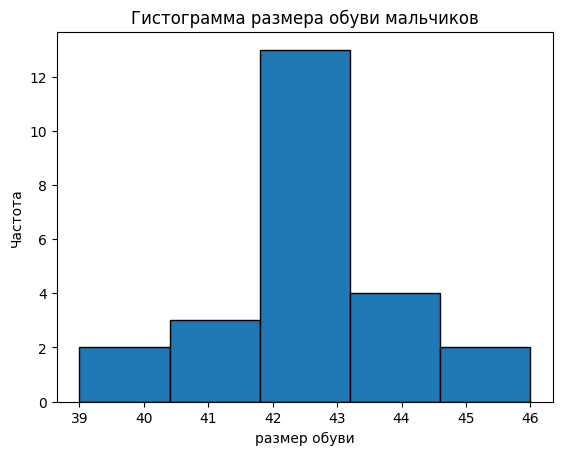

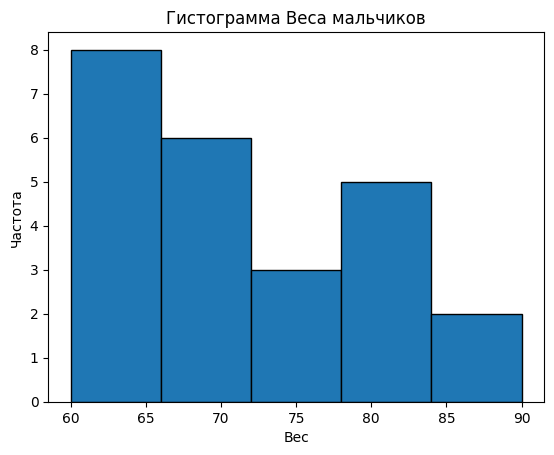

In [48]:
plt.hist(df_boys['obuv'], bins=5, edgecolor='black')  
plt.xlabel('размер обуви')
plt.ylabel('Частота')
plt.title('Гистограмма размера обуви мальчиков')
plt.show()

plt.hist(df_boys['ves'], bins=5, edgecolor='black')  
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.title('Гистограмма Веса мальчиков')
plt.show()


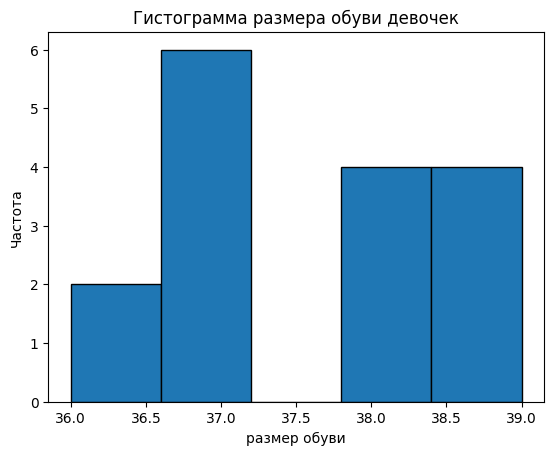

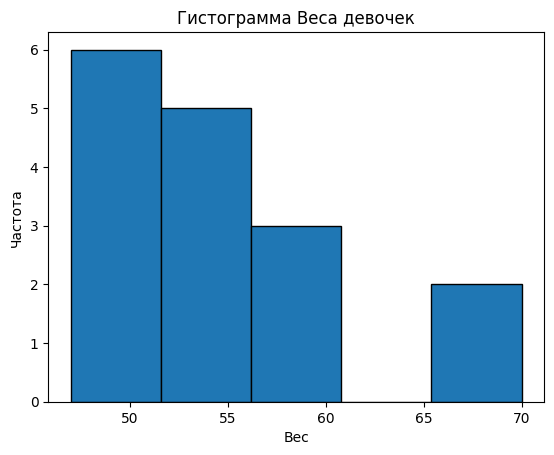

In [49]:
plt.hist(df_girls['obuv'], bins=5, edgecolor='black')  
plt.xlabel('размер обуви')
plt.ylabel('Частота')
plt.title('Гистограмма размера обуви девочек')
plt.show()

plt.hist(df_girls['ves'], bins=5, edgecolor='black')  
plt.xlabel('Вес')
plt.ylabel('Частота')
plt.title('Гистограмма Веса девочек')
plt.show()


In [50]:

series = pd.Series(df_boys['rost'])

# Вычисление среднего
среднее = series.mean()

# Вычисление моды
мода = series.mode().values[0]

# Вычисление медианы
медиана = series.median()

# Вычисление размаха
размах = series.max() - series.min()

# Вычисление дисперсии
дисперсия = series.var()

# Вычисление стандартного отклонения
стандартное_отклонение = series.std()

# Вычисление асимметрии
асимметрия = series.skew()

# Вычисление эксцесса
эксцесс = series.kurtosis()
print('Boys')
print("Среднее:", среднее)
print("Мода:", мода)
print("Медиана:", медиана)
print("Размах:", размах)
print("Дисперсия:", дисперсия)
print("Стандартное отклонение:", стандартное_отклонение)
print("Стандартная асимметрия:", асимметрия)
print("Стандартный эксцесс:", эксцесс)


Boys
Среднее: 180.25
Мода: 175.0
Медиана: 180.0
Размах: 24.0
Дисперсия: 40.19565217391305
Стандартное отклонение: 6.340004114660577
Стандартная асимметрия: 0.5029416834945422
Стандартный эксцесс: -0.39035463929279013


In [1]:
series = pd.Series(df_boys['obuv'])
series1 = pd.Series(df_boys['ves'])
# Вычисление среднего
среднее = series.mean()
среднее_ves = series1.mean()
# Вычисление моды
мода = series.mode().values[0]
мода_ves = series1.mode().values[0]
# Вычисление медианы
медиана = series.median()
медиана_ves = series1.median()
# Вычисление размаха
размах = series.max() - series.min()
размах_ves = series1.max() - series1.min()
# Вычисление дисперсии
дисперсия = series.var()
дисперсия_ves = series1.var()
# Вычисление стандартного отклонения
стандартное_отклонение = series.std()
стандартное_отклонение_ves = series1.std()
# Вычисление асимметрии
асимметрия = series.skew()
асимметрия_ves = series1.skew()
# Вычисление эксцесса
эксцесс = series.kurtosis()
эксцесс_ves = series1.kurtosis()
print('boys')
print("Среднее:",среднее)
print("Мода:",мода)
print("Медиана:", медиана)
print("Размах:", размах)
print("Дисперсия:", дисперсия)
print("Стандартное отклонение:", стандартное_отклонение)
print("Стандартная асимметрия:", асимметрия)
print("Стандартный эксцесс:", эксцесс)
print('------------------')
print("Среднее ves:", среднее_ves)
print("Мода ves:", мода_ves)
print("Медиана ves :", медиана_ves)
print("Размах ves :", размах_ves)
print("Дисперсия ves:", дисперсия_ves)
print("Стандартное отклонение ves:", стандартное_отклонение_ves)
print("Стандартная асимметрия ves:", асимметрия_ves)
print("Стандартный эксцесс ves:", эксцесс_ves)



NameError: name 'pd' is not defined

In [52]:

series = pd.Series(df_girls['rost'])

# Вычисление среднего
среднее = series.mean()

# Вычисление моды
мода = series.mode().values[0]

# Вычисление медианы
медиана = series.median()

# Вычисление размаха
размах = series.max() - series.min()

# Вычисление дисперсии
дисперсия = series.var()

# Вычисление стандартного отклонения
стандартное_отклонение = series.std()

# Вычисление асимметрии
асимметрия = series.skew()

# Вычисление эксцесса
эксцесс = series.kurtosis()
print('Girls')
print("Среднее:", среднее)
print("Мода:", мода)
print("Медиана:", медиана)
print("Размах:", размах)
print("Дисперсия:", дисперсия)
print("Стандартное отклонение:", стандартное_отклонение)
print("Стандартная асимметрия:", асимметрия)
print("Стандартный эксцесс:", эксцесс)


Girls
Среднее: 166.375
Мода: 160.0
Медиана: 166.5
Размах: 17.0
Дисперсия: 29.316666666666666
Стандартное отклонение: 5.414486740833952
Стандартная асимметрия: 0.34963999029715886
Стандартный эксцесс: -0.9101313830440185


In [53]:
series = pd.Series(df_girls['obuv'])
series1 = pd.Series(df_girls['ves'])
# Вычисление среднего
среднее = series.mean()
среднее_ves = series1.mean()
# Вычисление моды
мода = series.mode().values[0]
мода_ves = series1.mode().values[0]
# Вычисление медианы
медиана = series.median()
медиана_ves = series1.median()
# Вычисление размаха
размах = series.max() - series.min()
размах_ves = series1.max() - series1.min()
# Вычисление дисперсии
дисперсия = series.var()
дисперсия_ves = series1.var()
# Вычисление стандартного отклонения
стандартное_отклонение = series.std()
стандартное_отклонение_ves = series1.std()
# Вычисление асимметрии
асимметрия = series.skew()
асимметрия_ves = series1.skew()
# Вычисление эксцесса
эксцесс = series.kurtosis()
эксцесс_ves = series1.kurtosis()
print('Girls')
print("Среднее:",среднее)
print("Мода:",мода)
print("Медиана:", медиана)
print("Размах:", размах)
print("Дисперсия:", дисперсия)
print("Стандартное отклонение:", стандартное_отклонение)
print("Стандартная асимметрия:", асимметрия)
print("Стандартный эксцесс:", эксцесс)
print('------------------')
print("Среднее ves:", среднее_ves)
print("Мода ves:", мода_ves)
print("Медиана ves :", медиана_ves)
print("Размах ves :", размах_ves)
print("Дисперсия ves:", дисперсия_ves)
print("Стандартное отклонение ves:", стандартное_отклонение_ves)
print("Стандартная асимметрия ves:", асимметрия_ves)
print("Стандартный эксцесс ves:", эксцесс_ves)



Girls
Среднее: 37.625
Мода: 37.0
Медиана: 37.5
Размах: 3.0
Дисперсия: 1.05
Стандартное отклонение: 1.02469507659596
Стандартная асимметрия: 0.03983265603871564
Стандартный эксцесс: -1.0665071889561686
------------------
Среднее ves: 54.5625
Мода ves: 47.0
Медиана ves : 53.5
Размах ves : 23.0
Дисперсия ves: 45.59583333333333
Стандартное отклонение ves: 6.7524686843652475
Стандартная асимметрия ves: 1.1947606647594446
Стандартный эксцесс ves: 1.0517214706184612


Математическая формула для вычисления выборочного среднего (X̄) выглядит следующим образом:

X̄ = (x₁ + x₂ + x₃ + ... + xₙ) / n

Где:

X̄ - выборочное среднее (среднее значение).
x₁, x₂, x₃, ... xₙ - значения в выборке.
n - количество значений в выборке.

S² = Σ(xᵢ - X̄)² / (n - 1)

Где:

S² - несмещенная выборочная дисперсия.
xᵢ - значения в выборке.
X̄ - выборочное среднее.
n - количество значений в выборке.



(Выборочная) мода - это значение или значения в выборке, которые встречаются наиболее часто. В выборке может быть одна мода (унимодальная выборка), несколько мод (мультимодальная выборка), или вообще не быть моды, если все значения в выборке уникальны и не повторяются с одинаковой частотой.

Давайте рассмотрим пример:

Предположим, у нас есть следующая выборка оценок студентов по математике:

78, 85, 92, 78, 90, 78, 85, 88, 92

Чтобы найти моду этой выборки, мы должны определить, какое значение повторяется наибольшее количество раз.

В данной выборке значения 78 встречаются 3 раза, значения 85 и 92 также встречаются 2 раза, а значения 88 и 90 встречаются по 1 разу. Наиболее часто встречающееся значение - это 78. Поэтому мода этой выборки равна 78.

(Выборочная) медиана - это значение, которое разделяет упорядоченную выборку пополам, так что половина значений находится слева от медианы, и половина - справа. В случае, если в выборке четное количество значений, медиана вычисляется как среднее арифметическое двух центральных значений. В случае нечетного количества значений, медиана равна центральному значению выборки.

Давайте рассмотрим пример для лучшего понимания:

Предположим, у нас есть следующая выборка возрастов студентов:

19, 22, 23, 24, 25, 26, 30

Сначала отсортируем эту выборку в порядке возрастания:

19, 22, 23, 24, 25, 26, 30

Теперь у нас есть 7 значений в выборке, что является нечетным числом, поэтому медианой будет центральное значение, которое в данном случае равно 24. Это означает, что половина студентов в этой выборке моложе 24 лет, а другая половина старше 24 лет.
В выборке с четным количеством значений,чтобы найти медиану, мы возьмем среднее арифметическое двух центральных значений 

Коэффициент асимметрии (Skewness):

Коэффициент асимметрии (Skewness) можно вычислить по следующей формуле:

Skewness = Σ((Xi - X̄)³ / (n * S³))

Где:

Xi - каждое значение в выборке.
X̄ - выборочное среднее.
n - количество значений в выборке.
S - выборочное стандартное отклонение.
Знак коэффициента асимметрии указывает на направление асимметрии:

Положительное значение: правосторонняя асимметрия.
Отрицательное значение: левосторонняя асимметрия.
Близкое к нулю значение: симметрия.
Коэффициент эксцесса (Kurtosis):

Коэффициент эксцесса (Kurtosis) можно вычислить по следующей формуле:

Kurtosis = Σ((Xi - X̄)⁴ / (n * S⁴)) - 3

Где:

Xi - каждое значение в выборке.
X̄ - выборочное среднее.
n - количество значений в выборке.
S - выборочное стандартное отклонение.
Эксцесс обычно вычитают 3, чтобы получить более удобные значения:

Положительное значение эксцесса: лептокуртоз (острый пик).
Отрицательное значение эксцесса: плоскокуртоз (плоский пик).
Эксцесс равный 0: мезокуртоз (близкий к нормальному распределению пик).






Коэффициент вариации вычисляется по следующей формуле:

CV = (S / X̄) * 100%

Где:

CV - коэффициент вариации.
S - выборочное стандартное отклонение.
X̄ - выборочное среднее (среднее значение).
Использование коэффициента вариации:

Сравнение изменчивости: CV позволяет сравнивать изменчивость данных между разными выборками или группами. Большой коэффициент вариации указывает на большую относительную изменчивость данных, в то время как маленький CV указывает на меньшую изменчивость.

Стандартизация: CV позволяет стандартизировать меру изменчивости в процентах относительно среднего значения. Это особенно полезно при сравнении данных с разными единицами измерения.

Принятие решений: CV может помочь в принятии решений, связанных с рисками и неопределенностью. Высокий коэффициент вариации может свидетельствовать о более рискованных ситуациях, где данные меняются сильно относительно среднего значения.

Качество данных: CV может использоваться для оценки качества данных. Большой коэффициент вариации может указывать на проблемы с надежностью данных или нестабильностью процесса.

Прогнозирование: В некоторых случаях, например, при прогнозировании спроса на товары или услуги, знание коэффициента вариации может помочь учесть изменчивость и риски при разработке стратегии.

Репрезентативность выборки - это свойство выборки, которое означает, что она точно или приближенно отражает основные характеристики и свойства генеральной совокупности, из которой была взята выборка. Репрезентативная выборка должна быть такой, что результаты и выводы, сделанные на основе анализа этой выборки, можно обобщить на всю генеральную совокупность без существенных искажений.

Важные аспекты репрезентативной выборки включают:

Случайность: Выборка должна быть случайной, что означает, что каждый элемент из генеральной совокупности имеет равные шансы быть включенным в выборку. Это помогает избежать смещения выборки и обеспечивает обобщаемость результатов.

Разнообразие: Выборка должна отражать разнообразие характеристик, присущих генеральной совокупности. Например, если вы исследуете предпочтения потребителей по возрасту, выборка должна включать людей разного возраста, чтобы отразить многообразие возрастных групп в генеральной совокупности.

Размер выборки: Размер выборки должен быть достаточным, чтобы обеспечить статистическую значимость и точность оценок. Маленькая выборка может привести к ненадежным результатам.

Отсутствие искажений: Выборка не должна содержать систематические искажения (смещения), которые могут исказить результаты. Например, если при создании выборки предпочтение отдавалось определенной группе, это может повлиять на репрезентативность выборки.

Актуальность: Выборка должна быть актуальной и соответствовать временным рамкам и условиям исследования. Например, данные о потребительских предпочтениях, собранные десятилетие назад, могут быть неактуальными для сегодняшних реалий.

Планирование и методы сбора данных: Процесс выборки и сбора данных должен быть строго спланирован и выполнен с соблюдением методологии, чтобы избежать искажений.



гистограмма частот :

В гистограмме, ось X представляет собой интервалы значений (интервалы группировки), а ось Y представляет собой частоту (количество значений) в каждом интервале.



Кумулята частостей (или кумулятивная частота) - это статистический термин, который используется для обозначения суммарного накопления частот или количества значений, не превышающих определенного уровня или интервала в наборе данных. Кумулята частостей представляет собой кумулятивную сумму частот для всех значений, начиная с самого низкого значения и постепенно увеличиваясь к более высоким значениям.

Статистический аналог кумуляты частостей можно найти в кумулятивной таблице (или таблице кумулятивных частот), которая представляет собой таблицу, где для каждого значения или интервала значений указывается кумулятивное количество значений, которые меньше или равны этому значению или интервалу.

Кумулята частостей (или кумулятивная частотная таблица) - это статистический инструмент, который используется для описания накопленной частоты значений или интервалов значений в выборке или генеральной совокупности. Кумулята частостей представляют собой таблицу или график, который показывает, как много значений находится в или ниже определенного интервала или значения.

Кумулята частостей аналогична статистическому инструменту, известному как кумулятивная частотная функция (как аналог кумулятивной частотной таблицы). Кумулятивная частотная функция представляет собой функцию, которая показывает накопленную частоту значений меньше или равных определенному значению.

Выборочное среднее для сгруппированных данных записывается следующим образом:

X̄ = Σ(f * x) / Σf

Где:

X̄ - выборочное среднее (среднее значение).
Σ - обозначает сумму.
f - частота (количество наблюдений) в каждом интервале или группе данных.
x - среднее значение или центр интервала данных.
